# Causal estimation of the EU_Turkey Deal on the crossings of migrants

In [ ]:
library(dplyr)

# treating nationalities which were used to go to the east routes UNTILL OCTOBER 2015
df_med <- read.csv("/frontex_09_23_nat_median_october_april_STANDARD.csv")

df_med <- df_med %>%
  mutate(RouteNat = paste(Route, Nationality, Border.type.or.inland, sep = " "))

**you can set the dates**

In [ ]:
# between 2011 and 2017 or 2018
df_med <- subset(df_med, subset = as.Date(date) >= as.Date("2011-01-01") & as.Date(date) <= as.Date("2017-02-01"))

In [ ]:
tail(df_med)

,Route,Nationality,Border.type.or.inland,date,flow,treated,flow_standardized,RouteNat
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
59971,Western Mediterranean Route,Yemen,Land,2017-02-01,0,1,-0.1764364,Western Mediterranean Route Yemen Land
59972,Western Mediterranean Route,Yemen,Sea,2017-02-01,0,1,-0.1764364,Western Mediterranean Route Yemen Sea
59973,Western Mediterranean Route,Zambia,Land,2017-02-01,0,0,-0.1764364,Western Mediterranean Route Zambia Land
59974,Western Mediterranean Route,Zambia,Sea,2017-02-01,0,0,-0.1764364,Western Mediterranean Route Zambia Sea
59975,Western Mediterranean Route,Zimbabwe,Land,2017-02-01,0,0,-0.1764364,Western Mediterranean Route Zimbabwe Land
59976,Western Mediterranean Route,Zimbabwe,Sea,2017-02-01,0,0,-0.1764364,Western Mediterranean Route Zimbabwe Sea


In [ ]:
df_med$RouteNat <- as.factor(df_med$RouteNat)

# Convert the factor to an integer as double
df_med$RouteNat <- as.integer(df_med$RouteNat)

# Convert it to double (if necessary)
df_med$RouteNat <- as.double(df_med$RouteNat)


# Convert integer variables to double
df_med <- df_med %>%
  mutate_at(vars(flow, treated), as.double)

df_med$Date_Num <- as.numeric(as.Date(paste(df_med$date, "-01", sep="")))

Time is not evenly distributed (possibly due to missing data).


If the number of units is more than 500, we randomly select 500 units to present.
        You can set "display.all = TRUE" to show all units.




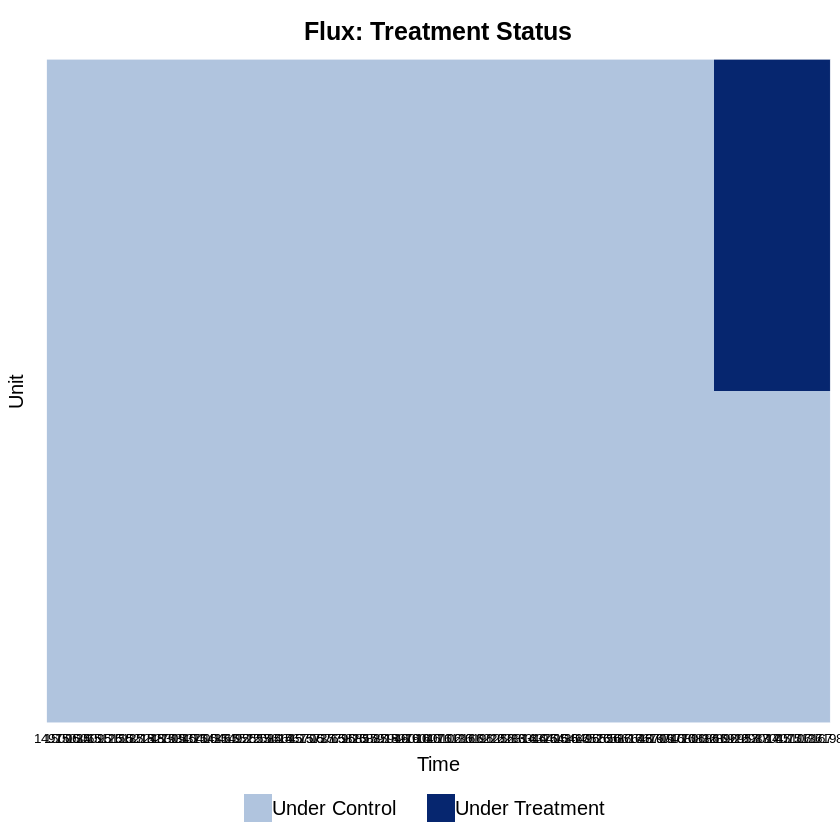

In [ ]:
library(panelView)
panelview(flow ~ treated, data = df_med, index = c("RouteNat","Date_Num"),
  axis.lab = "time", xlab = "Time", ylab = "Unit",
  gridOff = TRUE, by.timing = TRUE,
  background = "white", main = "Flux: Treatment Status")

Time is not evenly distributed (possibly due to missing data).




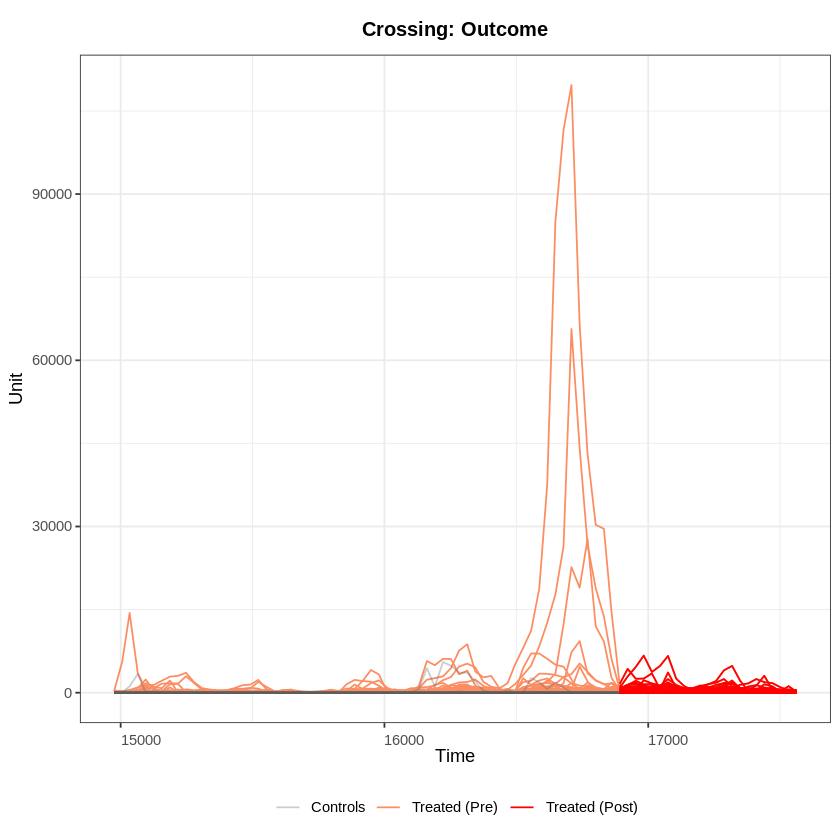

In [ ]:
panelview(flow ~ treated, data = df_med, index = c("RouteNat","Date_Num"),
  axis.lab = "time", xlab = "Time", ylab = "Unit",
  theme.bw = TRUE, type = "outcome", main = "Crossing: Outcome", display.all = TRUE)
#> Treatment has reversals.

## Matrix completion

In [ ]:
out_med.mc <- fect(flow ~ treated, data = df_med, index = c("RouteNat","Date_Num"),
          force = "two-way", method = "mc", CV = TRUE, group = "Route",
          se = TRUE, nboots = 200, parallel = TRUE)

Parallel computing ...


Cross-validating ...


Criterion: Mean Squared Prediction Error


Matrix completion method...



 lambda.norm = 1.00000; MSPE = 2311350.21612; MSPTATT = 2705.35166; MSE = 1999974.04340


 lambda.norm = 0.42170; MSPE = 1849716.24149; MSPTATT = 531.80060; MSE = 455189.24314



In [ ]:
print(out_med.mc)

Call:
fect.formula(formula = flow ~ treated, data = df_med, group = "Route", 
    index = c("RouteNat", "Date_Num"), force = "two-way", CV = TRUE, 
    method = "mc", se = TRUE, nboots = 200, parallel = TRUE)

ATT:
                             ATT  S.E. CI.lower CI.upper p.value
Tr obs equally weighted   -16.76 30.06   -75.67    42.16  0.5773
Tr units equally weighted -16.76 30.06   -75.67    42.16  0.5773


In [ ]:
out_med.mc$est.group.att

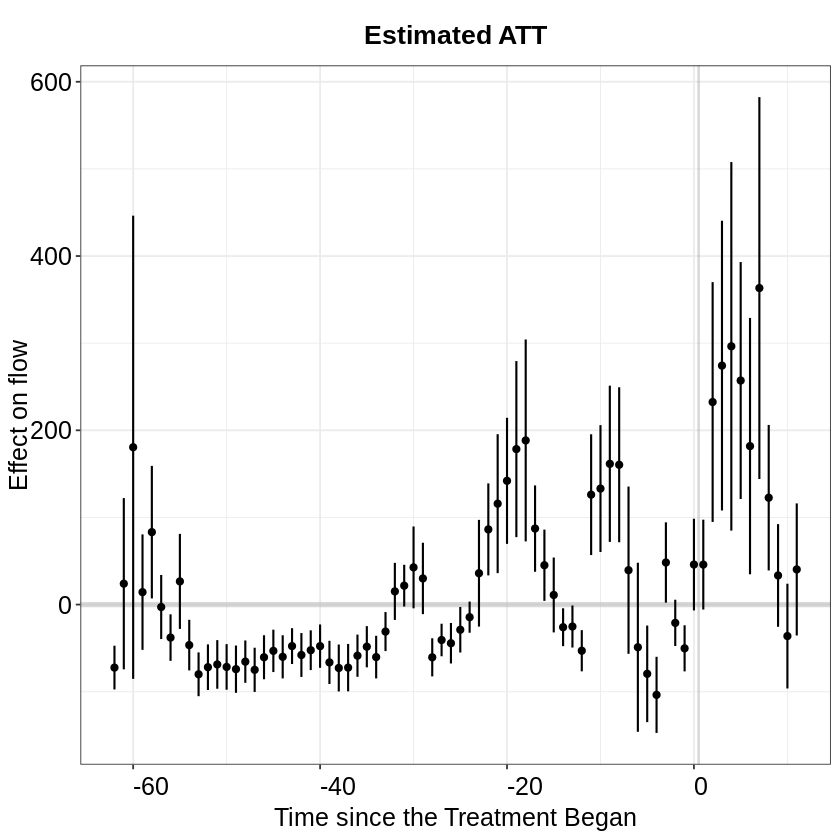

In [ ]:
plot(out_med.mc, main = "Estimated ATT", plot.ci = 0.90, show.group = "Central Mediterranean Route", count = FALSE )

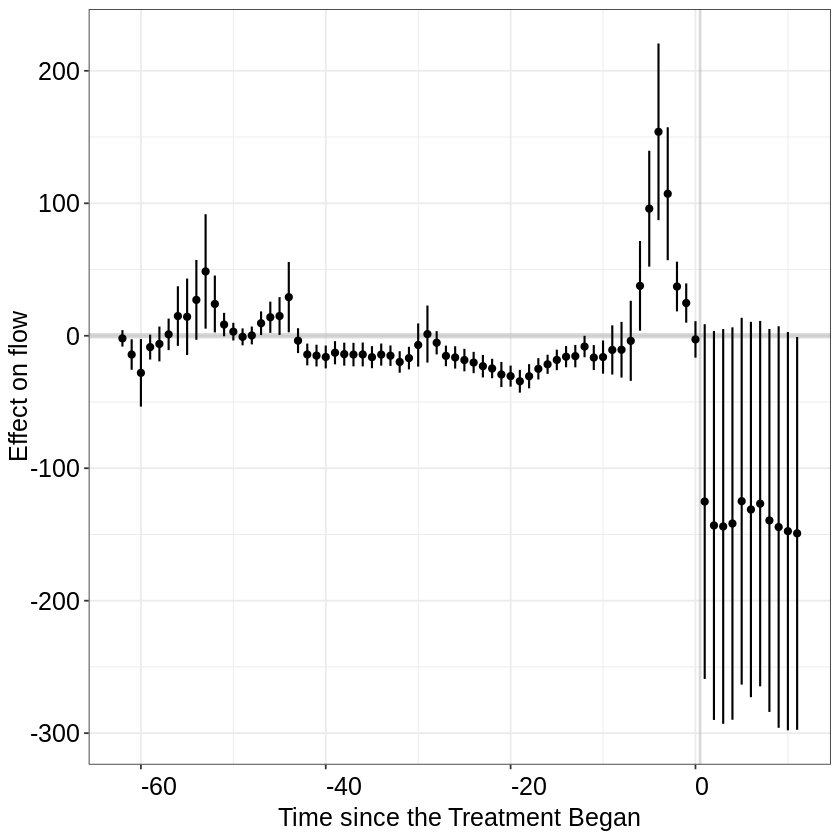

In [ ]:
plot(out_med.mc, main = "", plot.ci = 0.90, show.group = "Eastern Mediterranean Route", count = FALSE)

In [ ]:
plot(out_med.mc, main = "Estimated ATT", plot.ci = 0.90, show.group = "Central Mediterranean Route", count = False )

## Removing the syrians

Why? Because the syrians were subject to special rights through the agreement and had a favourable legal path to get to europe.

In [ ]:
# removing the syrian
df_med <- df_med[df_med$Nationality != "Syria", ]

In [ ]:
df_med

### NOTES

 **no syrians median**
>"2011-01-01" - "2017-02-01" --> significative effect for 95% interval for Central, while signficant for 90% the Eastern and western.
For the case with the syrians, we still have the significance for the central

> "2011-01-01" - "2018-02-01" --> same holds !




In [ ]:
out_med_sy.mc <- fect(flow ~ treated, data = df_med, index = c("RouteNat","Date_Num"), # "RouteNat:Date_Num",
          force = "two-way", method = "mc", CV = TRUE, group = "Route",
          se = TRUE, nboots = 200, parallel = TRUE)

Parallel computing ...


Cross-validating ...


Criterion: Mean Squared Prediction Error


Matrix completion method...



 lambda.norm = 1.00000; MSPE = 378976.24866; MSPTATT = 537.89047; MSE = 359264.14433


 lambda.norm = 0.42170; MSPE = 333248.75607; MSPTATT = 117.30964; MSE = 95037.42217


 lambda.norm = 0.17783; MSPE = 246395.08591; MSPTATT = 41.44802; MSE = 43185.65742


 lambda.norm = 0.07499; MSPE = 225748.83447; MSPTATT = 17.80819; MSE = 13472.43954

*


 lambda.norm = 0.03162; MSPE = 232168.88140; MSPTATT = 4.70950; MSE = 4444.46856


 lambda.norm = 0.01334; MSPE = 242934.68834; MSPTATT = 1.23780; MSE = 1301.81480


 lambda.norm = 0.00562; MSPE = 273682.75488; MSPTATT = 0.34321; MSE = 368.90204



 lambda.norm* = 0.0749894209332456





Bootstrapping for uncertainties ... 

200 runs


Cannot use full pre-treatment periods in the F test. The first period is removed.




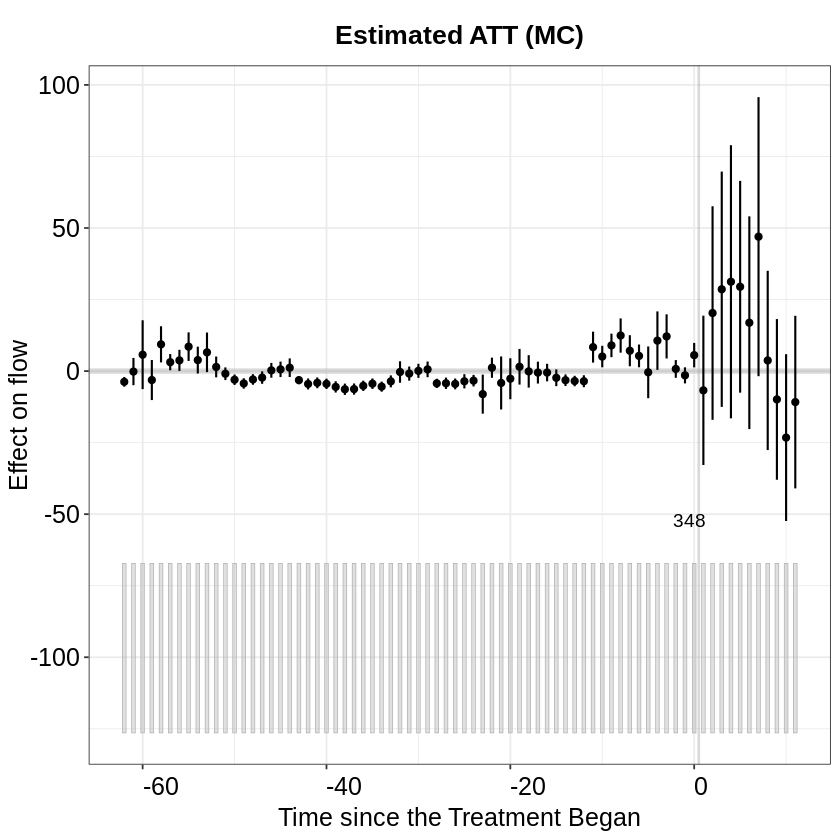

In [ ]:
plot(out_med_sy.mc, main = "Estimated ATT (MC)")

In [ ]:
print(out_med_sy.mc)

Call:
fect.formula(formula = flow ~ treated, data = df_med, group = "Route", 
    index = c("RouteNat", "Date_Num"), force = "two-way", CV = TRUE, 
    method = "mc", se = TRUE, nboots = 200, parallel = TRUE)

ATT:
                           ATT  S.E. CI.lower CI.upper p.value
Tr obs equally weighted   11.5 14.85   -17.62    40.61   0.439
Tr units equally weighted 11.5 14.85   -17.62    40.61   0.439


In [ ]:
out_med_sy.mc$est.group.att

,ATT,S.E.,CI.lower,CI.upper,p.value
Central Mediterranean Route,189.318946,53.969001,83.5416490,295.096244,0.0004516245
Eastern Borders Route,1.325483,1.325892,-1.2732175,3.924183,0.3174598571
Eastern Mediterranean Route,-63.418110,35.990272,-133.9577462,7.121527,0.0780540367
Western African Route,1.943015,1.322571,-0.6491769,4.535206,0.1418004177
Western Mediterranean Route,6.549187,3.098819,0.4756122,12.622761,0.0345626356


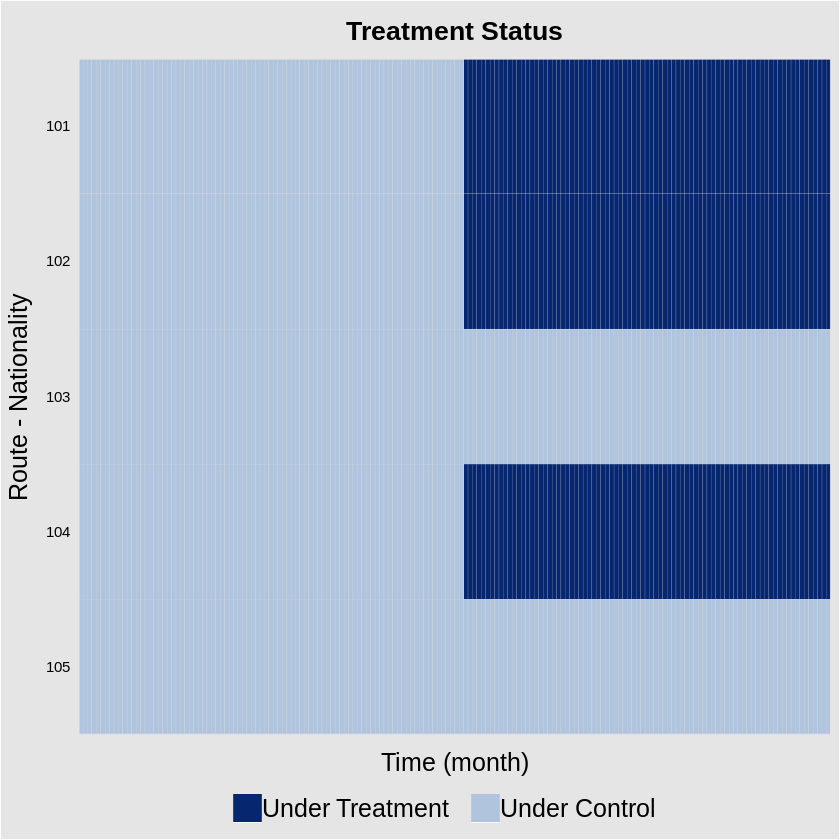

In [ ]:
plot(out_med_sy.mc, type = 'status', axis.lab = "unit", id = c(101:105),
cex.axis  = 0.6, ylab = "Route - Nationality", xlab = "Time (month)")




> Yes  !!!! Indeed we have a significative effect on the routes that we expect like having an effect on! And we do not have it in the Western route since it is too far away!

> We will notice en affect on the Western route after memorandum between lybia and italy!


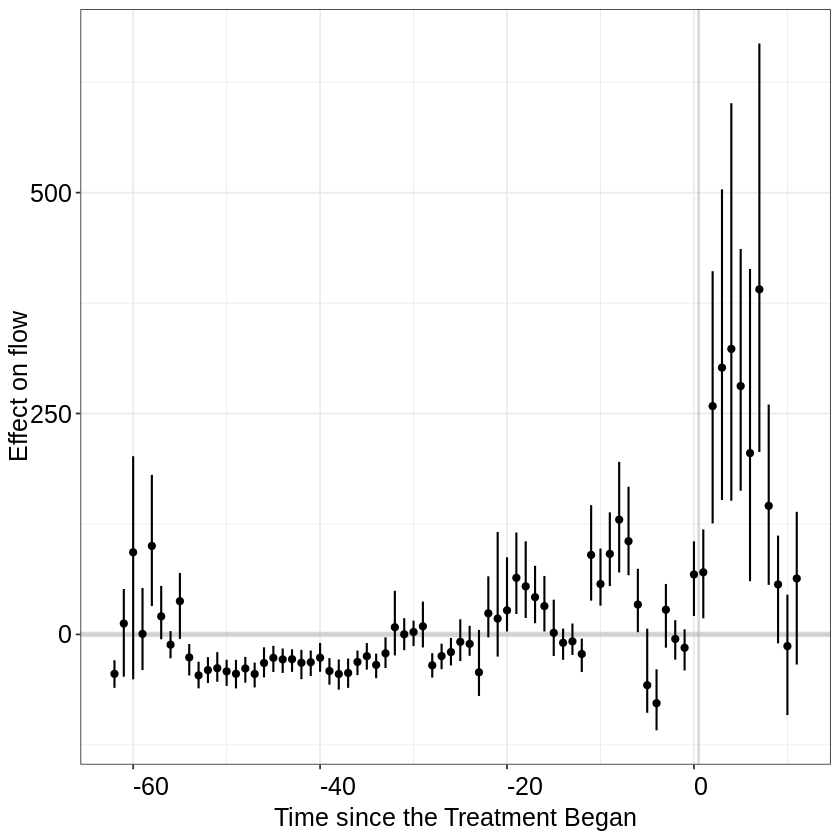

In [ ]:
plot(out_med_sy.mc, main = "", show.group = "Central Mediterranean Route", count = FALSE)

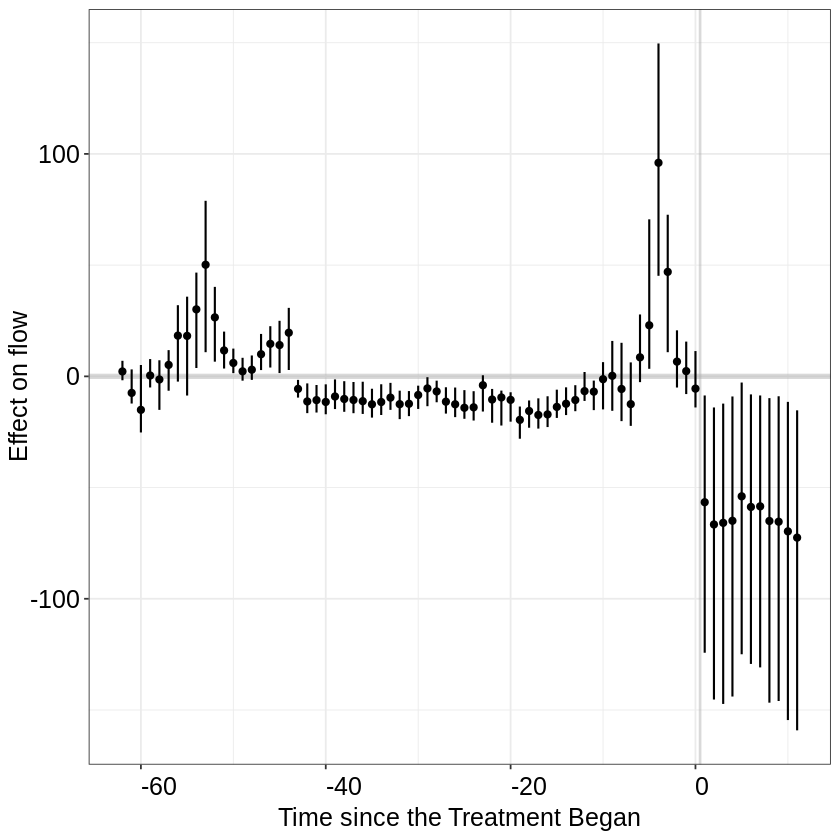

In [ ]:
plot(out_med_sy.mc, main = "", show.group = "Eastern Mediterranean Route", count= FALSE )

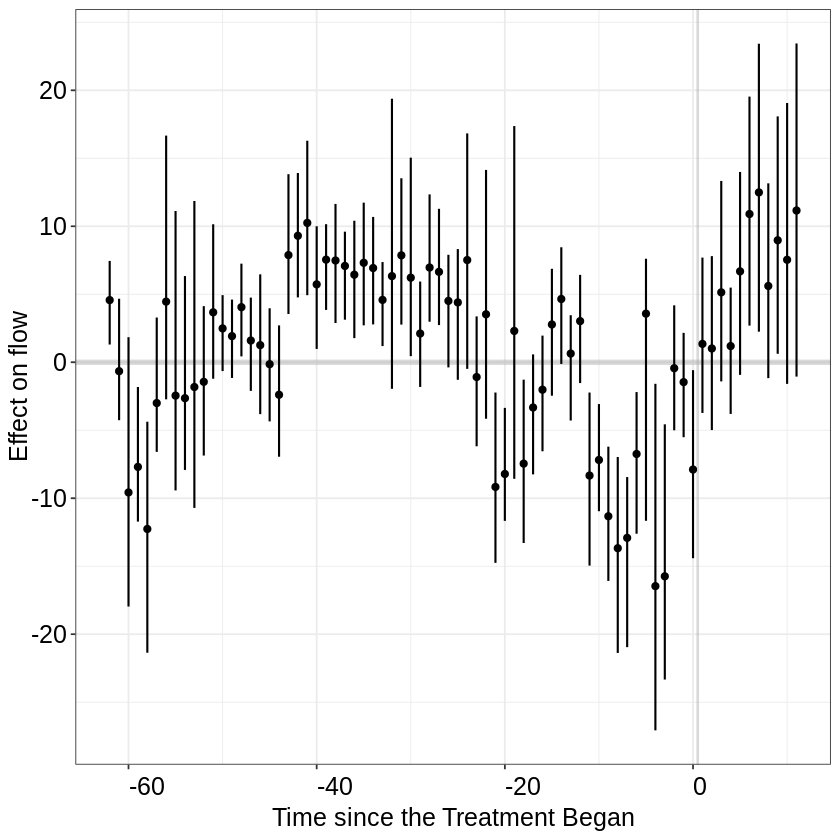

In [ ]:
plot(out_med_sy.mc, main = "", show.group = "Western Mediterranean Route", count = FALSE )


## Placebo test

In [ ]:
out_med_sy.mc.p <- fect(flow ~ treated, data = df_med, index = c("RouteNat","Date_Num"),
  force = "two-way", method = "mc",  lambda = out_med_sy.mc$lambda.cv,
  CV = 0, parallel = TRUE, se = TRUE, na.rm = TRUE, group = "Route",
  nboots = 500, placeboTest = TRUE, placebo.period = c(-3, 0))

Parallel computing ...


Bootstrapping for uncertainties ... 

500 runs




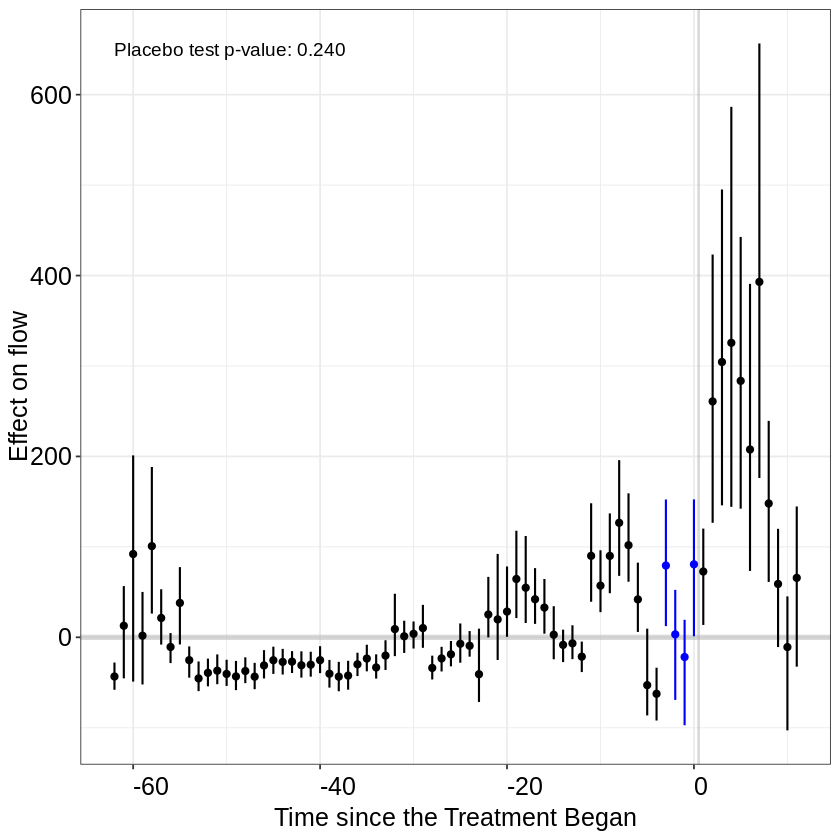

In [ ]:
plot(out_med_sy.mc.p, vis = "none", cex.text = 0.8, stats = c("placebo.p"), main = "", show.group = "Central Mediterranean Route", count = FALSE)

#"""A larger placebo p-value from a t-test and a smaller placebo TOST p-value are preferred."""